# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 56
2. Student Names - Santhosh Kumar Ramkumar and Sanjhana Rangaraj

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. **(2 points)** Write down the class-conditional data distributions for each of the classes defined above.

b. **(4 points)**. Derive the Bayes optimal decision boundaries for this problem.

c. **(4 points)** What is the Bayes Error rate for this classifier?

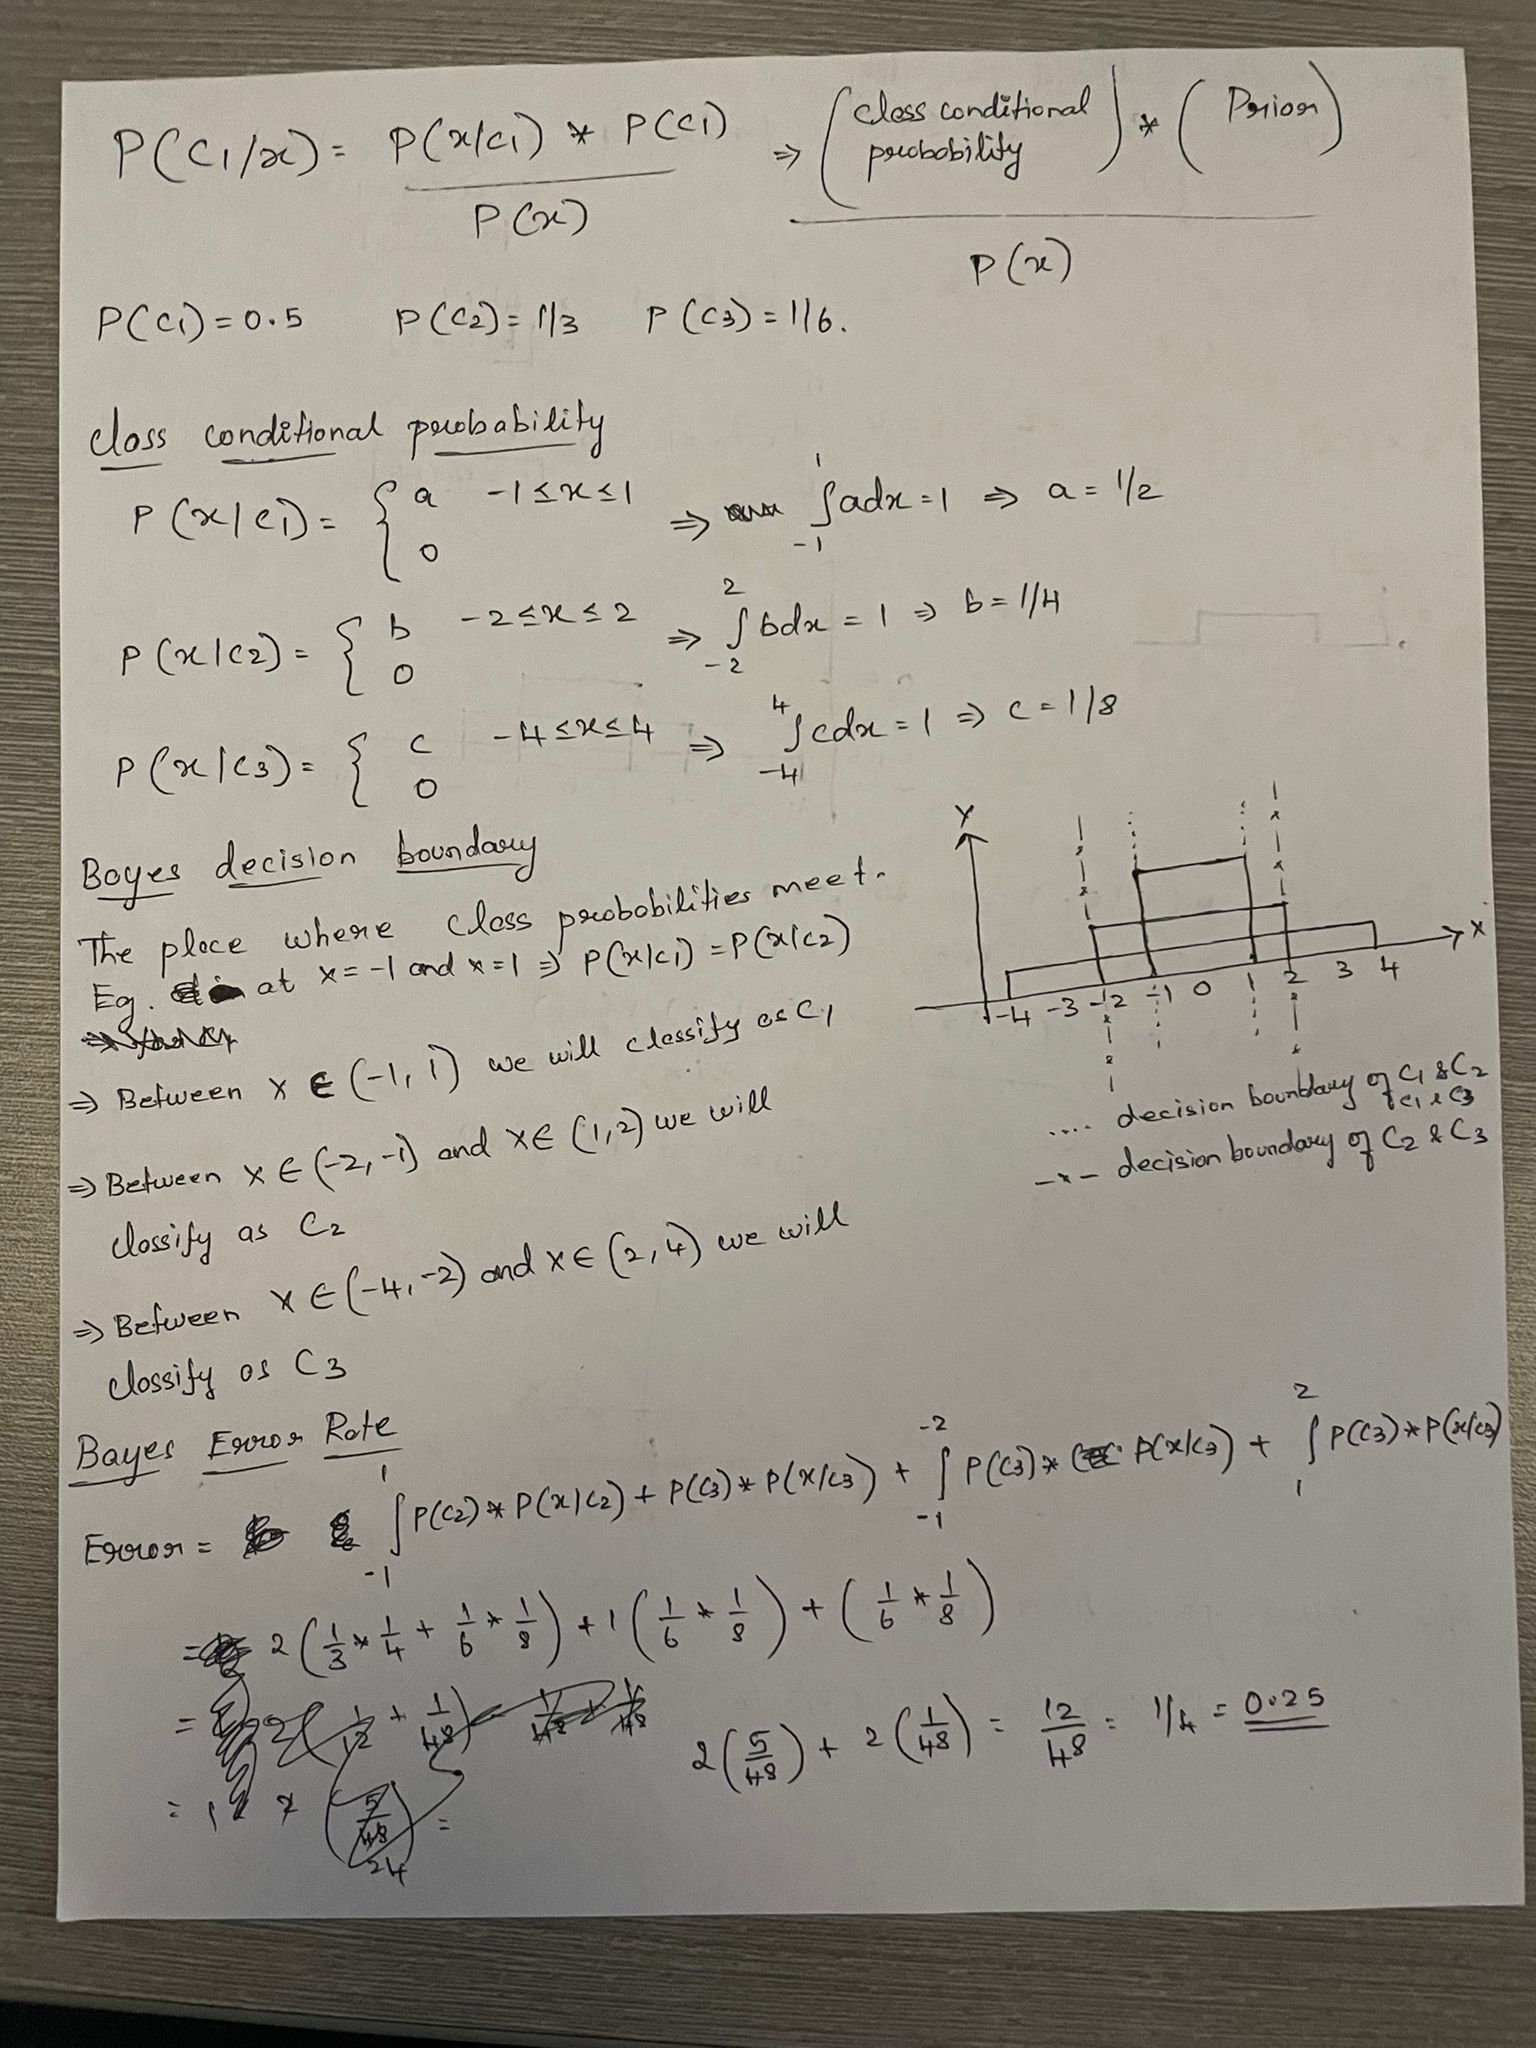

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd



C:\Users\rsk29\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


a. **(5 points)** Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [2]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', transform=transform, download=True)
### END CODE ###

  0%|                                                                                    | 0/182040794 [00:00<?, ?it/s]

  0%|                                                                                     | 0/64275384 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████| 64275384/64275384 [00:03<00:00, 17471066.11it/s]


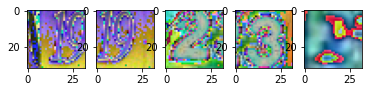

In [3]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. **(5 points)** Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [4]:


train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = random_split(train_dataset, [train_num, val_num])
### END CODE ###


# Create data loaders
### START CODE ###
# Create data loaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
### END CODE ###

c. **(5 points)** Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.fc1 = nn.Linear(32 * 32 * 3, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 10)
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ###
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        ### END CODE ###
        return x


In [6]:
model = MLP()
# Create the optimizer
### START CODE ###
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END CODE ###

d. **(5 points)** Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [7]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = torch.nn.functional.cross_entropy(out, target)
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = torch.nn.functional.cross_entropy(out, target)
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [8]:
epochs = 20
for e in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_acc = eval(model, val_loader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

  1%|▋                                                                                 | 2/229 [00:00<00:13, 17.31it/s]

Epoch: 1 Train Loss: 1.4766033977384545 Val Loss: 1.1388813948455547 Val Acc: 0.6499453999453999


  1%|▋                                                                                 | 2/229 [00:00<00:14, 15.93it/s]

Epoch: 2 Train Loss: 0.9757391621905599 Val Loss: 0.9332719757489875 Val Acc: 0.7155337155337156


  1%|▋                                                                                 | 2/229 [00:00<00:13, 17.06it/s]

Epoch: 3 Train Loss: 0.8664606312397102 Val Loss: 0.8894538077831659 Val Acc: 0.7322549822549822


  1%|▋                                                                                 | 2/229 [00:00<00:14, 15.93it/s]

Epoch: 4 Train Loss: 0.7886196800043493 Val Loss: 0.8219281726771289 Val Acc: 0.7567567567567568


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.32it/s]

Epoch: 5 Train Loss: 0.7309383106947698 Val Loss: 0.7768703361954352 Val Acc: 0.7721812721812722


  1%|▋                                                                                 | 2/229 [00:00<00:13, 17.00it/s]

Epoch: 6 Train Loss: 0.6946502534107039 Val Loss: 0.7519641469125699 Val Acc: 0.7855582855582856


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.72it/s]

Epoch: 7 Train Loss: 0.6704866554120551 Val Loss: 0.7616812315854159 Val Acc: 0.7749795249795249


  1%|▋                                                                                 | 2/229 [00:00<00:13, 17.15it/s]

Epoch: 8 Train Loss: 0.6439563034856374 Val Loss: 0.7122011803194307 Val Acc: 0.7938165438165438


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.52it/s]

Epoch: 9 Train Loss: 0.6185171051416347 Val Loss: 0.7035900731084127 Val Acc: 0.7988670488670488


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.49it/s]

Epoch: 10 Train Loss: 0.609719945771958 Val Loss: 0.7030944833493838 Val Acc: 0.7986622986622987


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.32it/s]

Epoch: 11 Train Loss: 0.5931658255566754 Val Loss: 0.7009503637836372 Val Acc: 0.7992082992082992


  1%|▋                                                                                 | 2/229 [00:00<00:15, 15.13it/s]

Epoch: 12 Train Loss: 0.5768531996717063 Val Loss: 0.713656385479291 Val Acc: 0.7962052962052962


  1%|▋                                                                                 | 2/229 [00:00<00:14, 15.14it/s]

Epoch: 13 Train Loss: 0.5673407671710105 Val Loss: 0.6842724972496325 Val Acc: 0.805965055965056


  1%|▋                                                                                 | 2/229 [00:00<00:14, 15.49it/s]

Epoch: 14 Train Loss: 0.557076404371539 Val Loss: 0.6792058698993676 Val Acc: 0.8068523068523068


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.66it/s]

Epoch: 15 Train Loss: 0.5429756401423433 Val Loss: 0.6903818139540443 Val Acc: 0.8043953043953044


  1%|▋                                                                                 | 2/229 [00:00<00:13, 16.45it/s]

Epoch: 16 Train Loss: 0.5356384299271506 Val Loss: 0.6564330356289642 Val Acc: 0.8143598143598143


  1%|▋                                                                                 | 2/229 [00:00<00:14, 16.00it/s]

Epoch: 17 Train Loss: 0.5344491814775746 Val Loss: 0.6635032886531943 Val Acc: 0.8128583128583129


  1%|▋                                                                                 | 2/229 [00:00<00:13, 17.21it/s]

Epoch: 18 Train Loss: 0.5265906717211565 Val Loss: 0.6942912388329554 Val Acc: 0.8036445536445537


  1%|▋                                                                                 | 2/229 [00:00<00:14, 16.10it/s]

Epoch: 19 Train Loss: 0.5159886089366773 Val Loss: 0.6537263951209149 Val Acc: 0.8187960687960688


100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:03<00:00, 17.14it/s]

Epoch: 20 Train Loss: 0.5064579311160441 Val Loss: 0.6960440621719705 Val Acc: 0.8051460551460552


e. **(5 points)** Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

100%|████████████████████████████████████████████████████████████████████████████████| 102/102 [00:05<00:00, 17.17it/s]


Test accuracy: 0.7736631837738168


<AxesSubplot:>

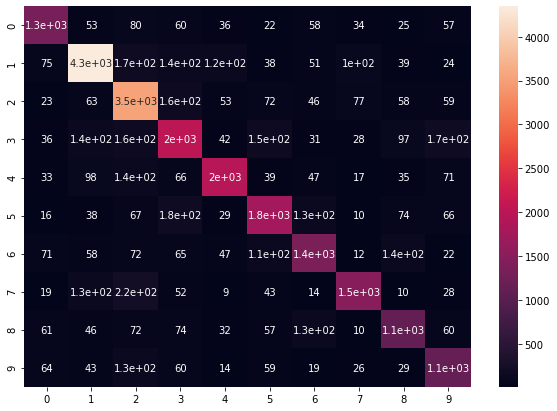

In [9]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_loader):
        out = model(data)
        # Get model's prediction
        ### START CODE ###
        _, pred = torch.max(out, 1)
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        all_y_true.extend(target.tolist())
        all_y_pred.extend(pred.tolist())
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
cm = confusion_matrix(all_y_true, all_y_pred)
### END CODE ###


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Q4. (10 points) Bayesian Belief Networks

a) **(3 points)** Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

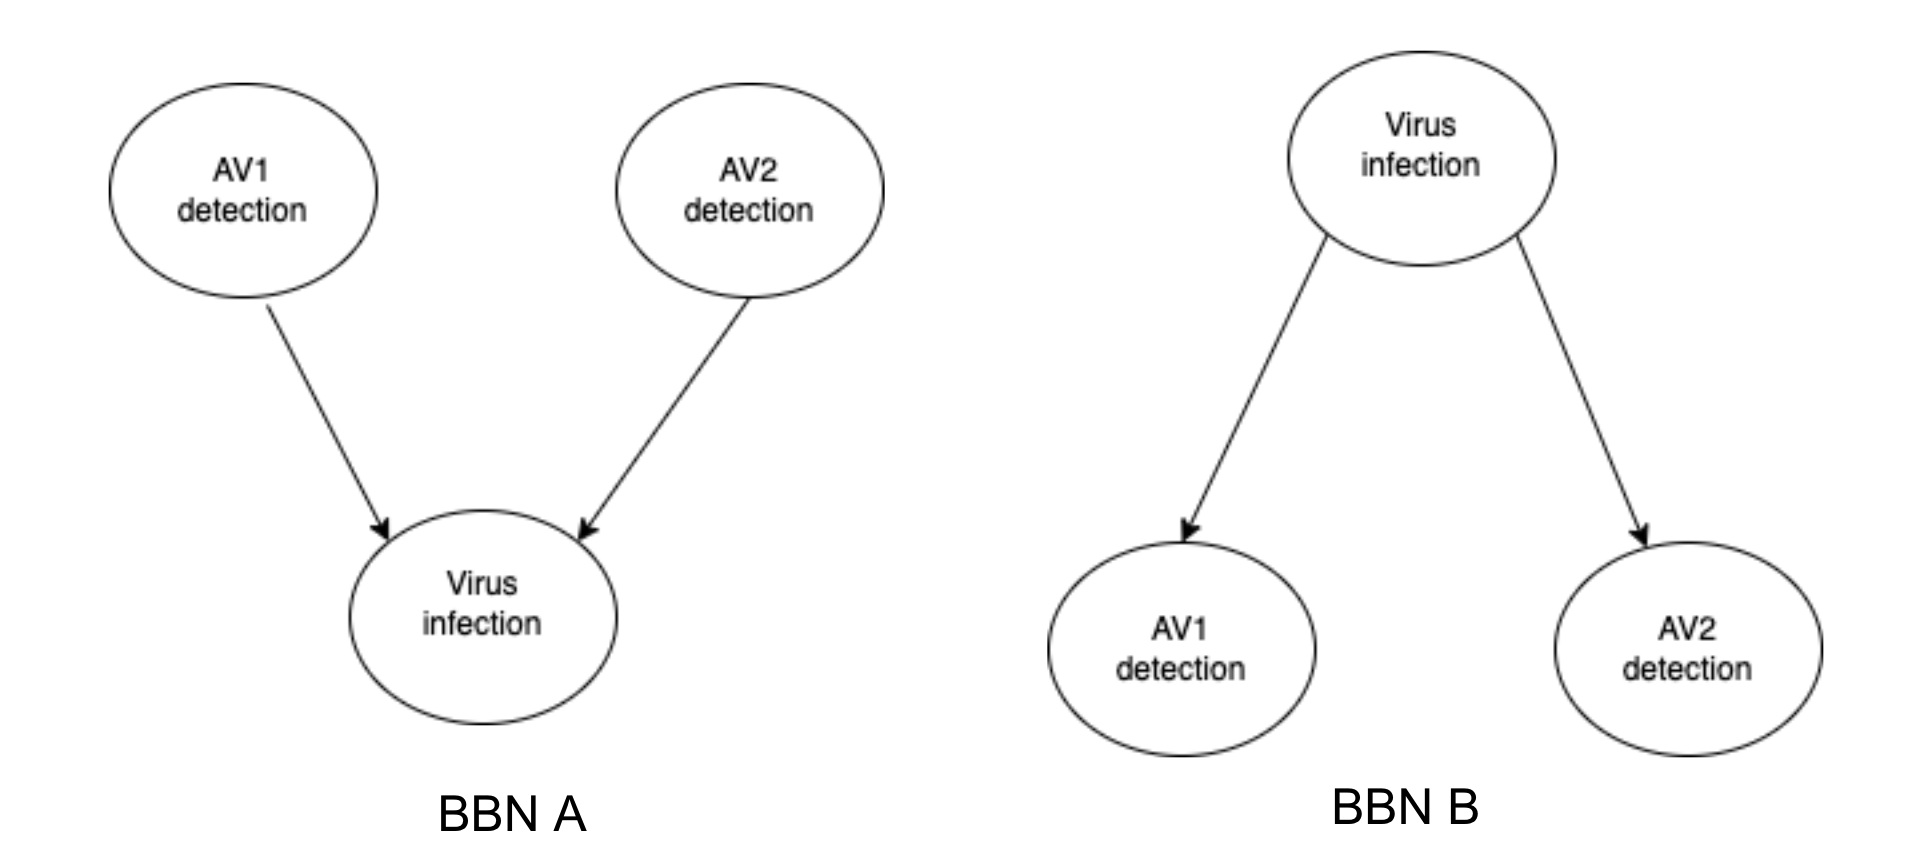

**Image A captures the independence relationship accurately**

b) **(7 points)** From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1\
P(AV2 detection = T) = 0.2

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 \
P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 \
P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 \
P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 

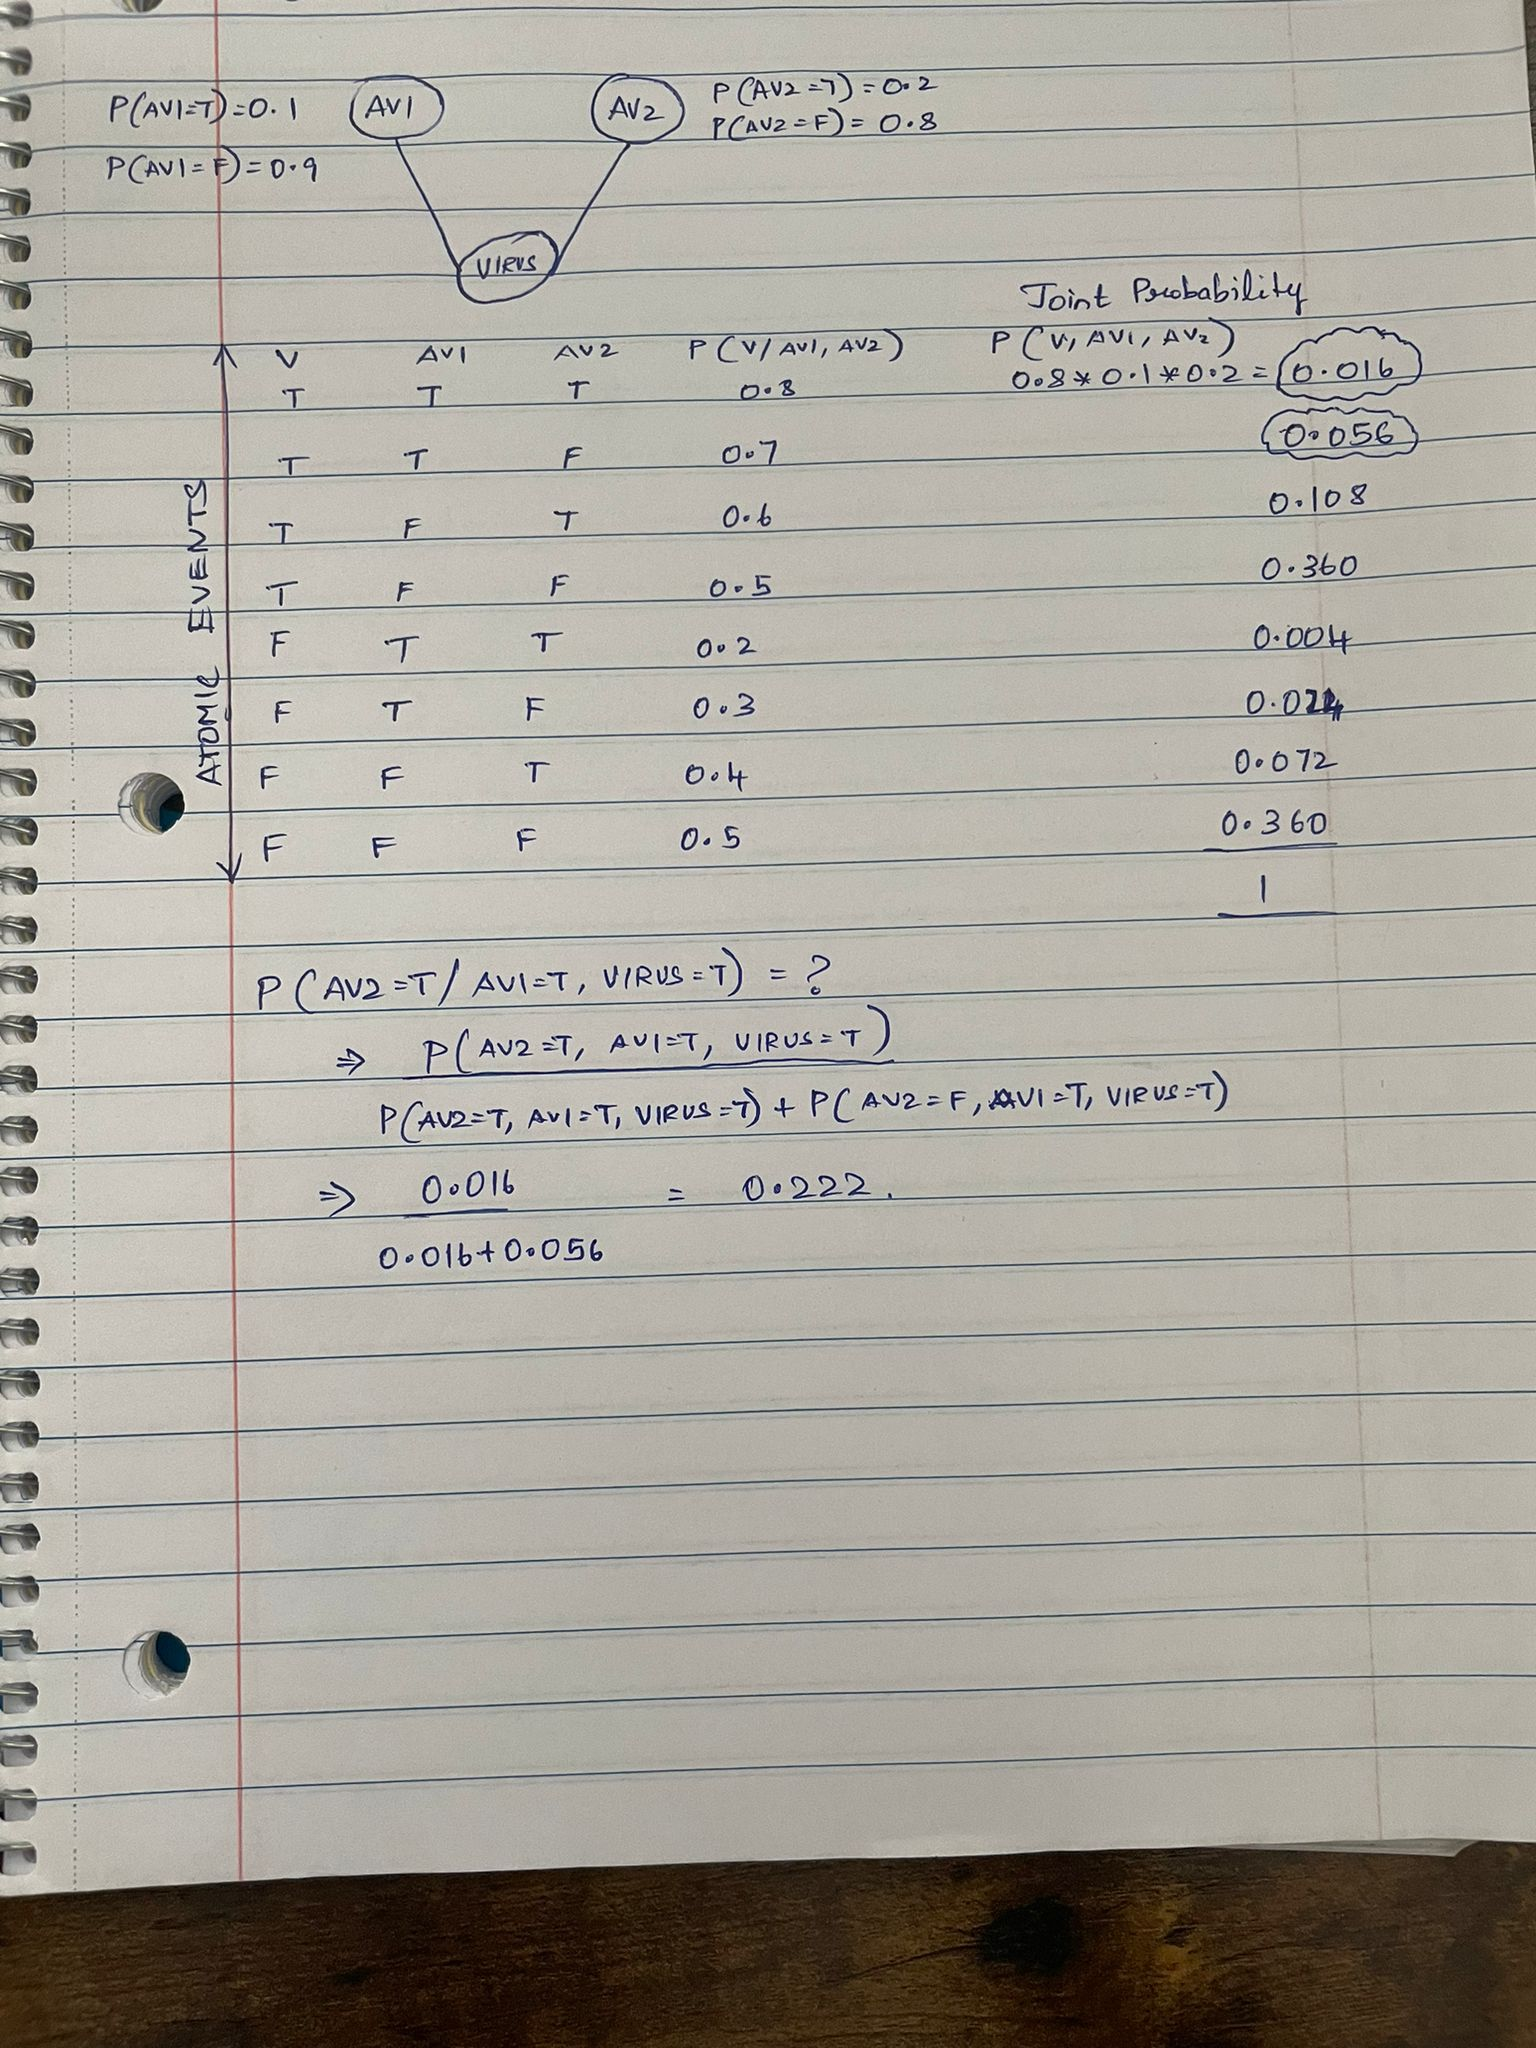

## Q5. (25 points) Classification using Sklearn and Model Evaluation

The objective of this question is to introduce you to Scikit-Learn and its various tools for creating and assessing classification models. You will work with the Customer_Churn_Telecom dataset. First, you'll need to perform some data preprocessing tasks on this dataset. After that, your task is to utilize Scikit-Learn to construct a range of classifiers using this dataset, followed by evaluating the performance of these models. To gain a better understanding of the specific steps involved, please proceed to read the subsequent sections of the question for further instructions.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [17]:
#lets print the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing and Splitting

In [19]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'

## CODE HERE ##
df = df.replace('No phone service','No')
df = df.replace('No internet service','No')

print_unique_col_values(df)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [20]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##
for i in yes_no_columns:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

df['gender'] = df['gender'].replace('Female',1)
df['gender'] = df['gender'].replace('Male',0)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [22]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##
df2 = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'])

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [23]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [24]:
# Train test split
from sklearn.model_selection import train_test_split

X = df2.loc[:, ~df2.columns.isin(['Churn'])].copy()
y = df2['Churn']

# Write code to make train and test splits
## START CODE ##

X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 15, stratify=y)

## END CODE ##

In [25]:
# Write code to make train and validation splits

## START CODE ##
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2 , random_state=15, stratify=y_temp)
## END CODE ##

In [26]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 Churn
0    3304
1    1196
Name: count, dtype: int64


Churn occurences throughout the data 
 Churn
0    5163
1    1869
Name: count, dtype: int64


## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

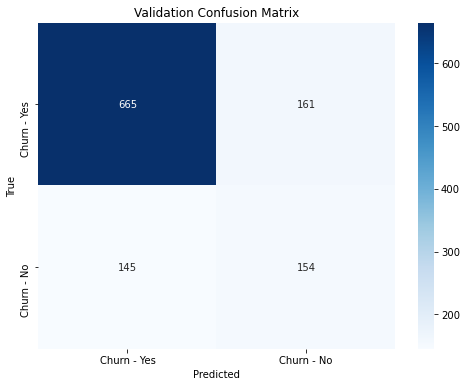

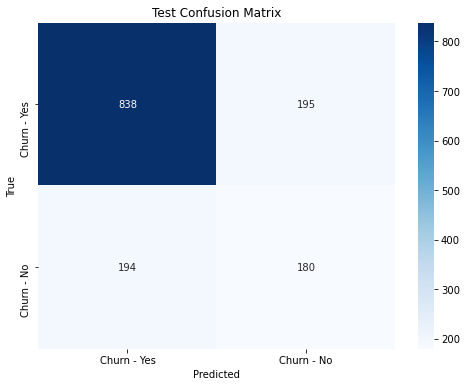

In [27]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## CODE HERE ##
dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train, y_train)


y_pred_val_dtc = dtc.predict(X_val)
confusion_val_dtc = confusion_matrix(y_val, y_pred_val_dtc)

y_pred_test_dtc = dtc.predict(X_test)
confusion_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)

# Define class labels
class_labels = ["Churn - Yes", "Churn - No"]

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_val_dtc, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test_dtc, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()


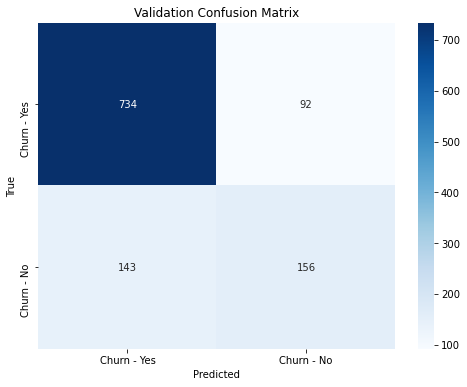

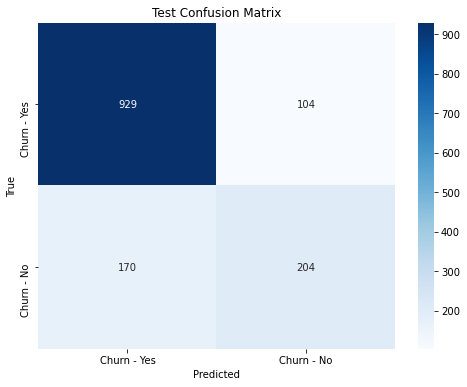

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##
lgr = LogisticRegression()

lgr.fit(X_train, y_train)

y_pred_val_lgr = lgr.predict(X_val)
confusion_val_lgr = confusion_matrix(y_val, y_pred_val_lgr)

y_pred_test_lgr = lgr.predict(X_test)
confusion_test_lgr = confusion_matrix(y_test, y_pred_test_lgr)

# Define class labels
class_labels = ["Churn - Yes", "Churn - No"]

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_val_lgr, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test_lgr, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()

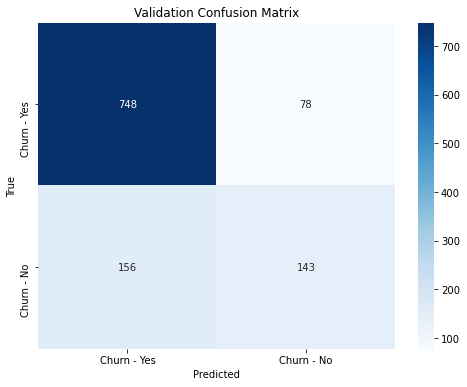

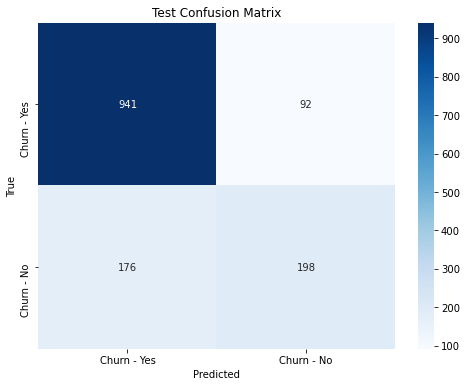

In [29]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier


## CODE HERE ##
mlp = MLPClassifier(max_iter=7500, learning_rate_init = 0.1, solver = 'adam', hidden_layer_sizes = (64,64,64))

mlp.fit(X_train, y_train)


y_pred_val_mlp = mlp.predict(X_val)
confusion_val_mlp = confusion_matrix(y_val, y_pred_val_mlp)

y_pred_test_mlp = mlp.predict(X_test)
confusion_test_mlp = confusion_matrix(y_test, y_pred_test_mlp)

# Define class labels
class_labels = ["Churn - Yes", "Churn - No"]

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_val_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()

(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

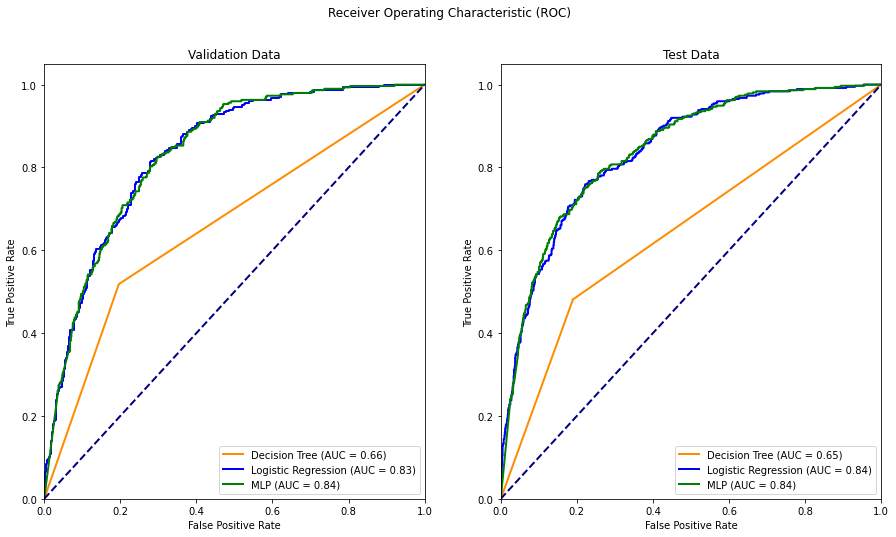

In [33]:

from sklearn.metrics import roc_curve, roc_auc_score, auc
## Decision Tree

y_prob_val_dtc = dtc.predict_proba(X_val)[:, 1]
y_prob_test_dtc = dtc.predict_proba(X_test)[:, 1]


# Calculate AUC-ROC for validation data
roc_auc_val_dtc = roc_auc_score(y_val, y_prob_val_dtc)
fpr_val_dtc, tpr_val_dtc, _ = roc_curve(y_val, y_prob_val_dtc)

# Calculate AUC-ROC for test data
roc_auc_test_dtc = roc_auc_score(y_test, y_prob_test_dtc)
fpr_test_dtc, tpr_test_dtc, _ = roc_curve(y_test, y_prob_test_dtc)

#Logistic Regression

y_prob_val_lgr = lgr.predict_proba(X_val)[:, 1]
y_prob_test_lgr = lgr.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for validation data
roc_auc_val_lgr = roc_auc_score(y_val, y_prob_val_lgr)
fpr_val_lgr, tpr_val_lgr, _ = roc_curve(y_val, y_prob_val_lgr)

# Calculate AUC-ROC for test data
roc_auc_test_lgr = roc_auc_score(y_test, y_prob_test_lgr)
fpr_test_lgr, tpr_test_lgr, _ = roc_curve(y_test, y_prob_test_lgr)

#MLP

y_prob_val_mlp = mlp.predict_proba(X_val)[:, 1]
y_prob_test_mlp = mlp.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for validation data
roc_auc_val_mlp = roc_auc_score(y_val, y_prob_val_mlp)
fpr_val_mlp, tpr_val_mlp, _ = roc_curve(y_val, y_prob_val_mlp)

# Calculate AUC-ROC for test data
roc_auc_test_mlp = roc_auc_score(y_test, y_prob_test_mlp)
fpr_test_mlp, tpr_test_mlp, _ = roc_curve(y_test, y_prob_test_mlp)


# Define class labels
class_labels = ["Churn - Yes", "Churn - No"]

# Assuming you've already calculated the ROC curve data and AUC scores for Decision Tree (dtc), Logistic Regression (lgr), and MLP (mlp)

# Set up subplots for validation and test data
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Receiver Operating Characteristic (ROC)")

# Validation Data ROC Curves
axes[0].set_title("Validation Data")
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])

# Test Data ROC Curves
axes[1].set_title("Test Data")
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])

for clf, color, label in [(dtc, 'darkorange', 'Decision Tree'), (lgr, 'blue', 'Logistic Regression'), (mlp, 'green', 'MLP')]:
    # Validation ROC Curve
    fpr_val, tpr_val, _ = roc_curve(y_val, clf.predict_proba(X_val)[:, 1])
    roc_auc_val = roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])
    axes[0].plot(fpr_val, tpr_val, color=color, lw=2, label=f'{label} (AUC = {roc_auc_val:.2f})')

    # Test ROC Curve
    fpr_test, tpr_test, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    axes[1].plot(fpr_test, tpr_test, color=color, lw=2, label=f'{label} (AUC = {roc_auc_test:.2f})')

# Add a diagonal line for reference
for ax in axes:
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels and legend
for ax in axes:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

plt.show()

(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

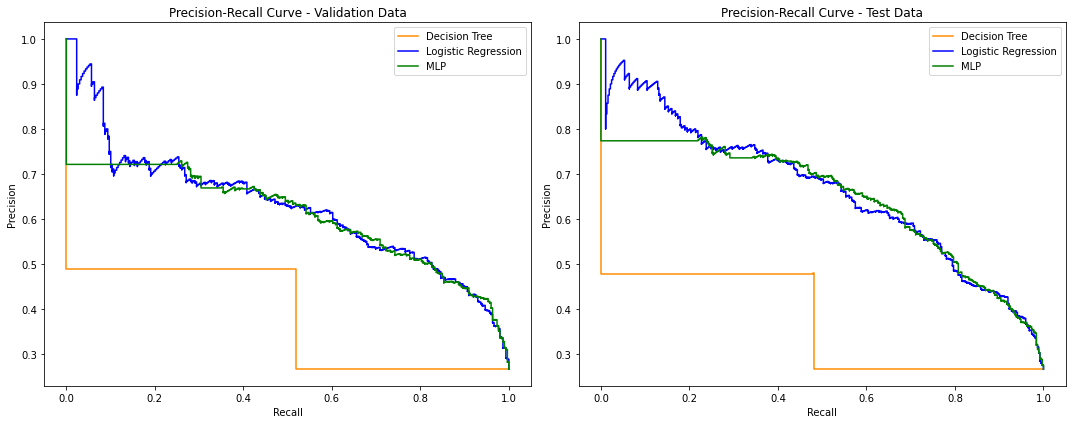

In [34]:
# Plot Precision-Recall curves

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculate precision and recall for each classifier on validation data
precision_val_dtc, recall_val_dtc, _ = precision_recall_curve(y_val, y_prob_val_dtc)
precision_val_lgr, recall_val_lgr, _ = precision_recall_curve(y_val, y_prob_val_lgr)
precision_val_mlp, recall_val_mlp, _ = precision_recall_curve(y_val, y_prob_val_mlp)

# Calculate precision and recall for each classifier on test data
precision_test_dtc, recall_test_dtc, _ = precision_recall_curve(y_test, y_prob_test_dtc)
precision_test_lgr, recall_test_lgr, _ = precision_recall_curve(y_test, y_prob_test_lgr)
precision_test_mlp, recall_test_mlp, _ = precision_recall_curve(y_test, y_prob_test_mlp)

# Create the Precision-Recall displays for validation data
pr_display_val_dtc = PrecisionRecallDisplay(precision=precision_val_dtc, recall=recall_val_dtc)
pr_display_val_lgr = PrecisionRecallDisplay(precision=precision_val_lgr, recall=recall_val_lgr)
pr_display_val_mlp = PrecisionRecallDisplay(precision=precision_val_mlp, recall=recall_val_mlp)

# Create the Precision-Recall displays for test data
pr_display_test_dtc = PrecisionRecallDisplay(precision=precision_test_dtc, recall=recall_test_dtc)
pr_display_test_lgr = PrecisionRecallDisplay(precision=precision_test_lgr, recall=recall_test_lgr)
pr_display_test_mlp = PrecisionRecallDisplay(precision=precision_test_mlp, recall=recall_test_mlp)

# Set up a subplot with two rows and one column
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Add the Precision-Recall displays to the subplot for validation data
pr_display_val_dtc.plot(label="Decision Tree", color="darkorange", ax=axes[0])
pr_display_val_lgr.plot(label="Logistic Regression", color="blue", ax=axes[0])
pr_display_val_mlp.plot(label="MLP", color="green", ax=axes[0])
axes[0].set_title("Precision-Recall Curve - Validation Data")
axes[0].legend()

# Add the Precision-Recall displays to the subplot for test data
pr_display_test_dtc.plot(label="Decision Tree", color="darkorange", ax=axes[1])
pr_display_test_lgr.plot(label="Logistic Regression", color="blue", ax=axes[1])
pr_display_test_mlp.plot(label="MLP", color="green", ax=axes[1])
axes[1].set_title("Precision-Recall Curve - Test Data")
axes[1].legend()

plt.tight_layout()
plt.show()